In [184]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Bank Marketing (Neural networks)

## Carga de datos

Locación de archivos



In [185]:
import os 
directory = 'Bank Marketing - Neural Networks'
filefull = 'datos_neural.xlsx'
filepath = os.path.join(directory, filefull)

Exploración de filas

In [186]:
from utils.read import explore_excel
explore_excel(filepath, lines=4)

Sheet: datos
Row 0:  age,job:admin.,job:blue-collar,job:technician,job:services,job:management,job:retired,job:self-employed,job:entrepreneur,job:unemployed,job:housemaid,job:student,job:unknown,marital:married,marital:single,marital:divorced,marital:unknown,education:university.degree,education:high.school,education:basic.9y,education:professional.course,education:basic.4y,education:basic.6y,education:unknown,default:no,default:unknown,housing:yes,housing:no,housing:unknown,loan:no,loan:yes,loan:unknown,contact:cellular,contact:telephone,month:may,month:jul,month:aug,month:jun,month:nov,month:apr,month:oct,month:sep,month:mar,day_of_week:thu,day_of_week:mon,day_of_week:tue,day_of_week:wed,day_of_week:fri,campaign,pdays,previous,poutcome:nonexistent,poutcome:failure,poutcome:success,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Adquirio el producto?
Row 1:  30.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0

Carga de datos:

In [187]:
import pandas as pd
data = pd.read_excel(filepath)
data.dtypes

age                                int64
job:admin.                         int64
job:blue-collar                    int64
job:technician                     int64
job:services                       int64
job:management                     int64
job:retired                        int64
job:self-employed                  int64
job:entrepreneur                   int64
job:unemployed                     int64
job:housemaid                      int64
job:student                        int64
job:unknown                        int64
marital:married                    int64
marital:single                     int64
marital:divorced                   int64
marital:unknown                    int64
education:university.degree        int64
education:high.school              int64
education:basic.9y                 int64
education:professional.course      int64
education:basic.4y                 int64
education:basic.6y                 int64
education:unknown                  int64
default:no      

## Normalizacion

Variables de entrada y variable objetivo:

In [188]:
import numpy as np
X = np.array(data[list(set(data.columns)-set(['Adquirio el producto?']))].values, dtype='float64')
y = np.array(data['Adquirio el producto?'].values, dtype='float64')

In [189]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [190]:
Xscaled = scaler.transform(X)

## Oversampling

In [196]:
from utils.sampling import oversampling
Xext, yext = oversampling(Xscaled, y)

## Datos de entrenamiento y prueba

In [197]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(Xext, yext, test_size=0.4)

# Aprendizaje con red neuronal (MLP)

Construcción de la red neuronal:

In [198]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', activation='logistic', hidden_layer_sizes=(4, 4, 4))

Entrenamiento:

In [199]:
clf.fit(Xtrain, ytrain)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(4, 4, 4), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

Score sobre datos de entrenamiento:

In [182]:
clf.score(Xtrainover, ytrainover)

0.80930656934306566

Score sobre datos de prueba:

In [200]:
clf.score(Xtest, ytest)

0.77103918228279389

Calculo de TPR y FPR:

In [202]:
ytestpred = clf.predict(Xtest)

In [209]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, ytestpred)
print 'TPR: {:.2%}'.format(1.0 * cm[1][1] / (cm[1][0] + cm[1][1]))
print 'FPR: {:.2%}'.format(1.0 * cm[0][1] / (cm[0][0] + cm[0][1]))

TPR: 69.87%
FPR: 15.76%


Curva ROC:

In [213]:
ytestprob = clf.predict_proba(Xtest)
ytestprob1 = [yy[1] for yy in ytestprob]

In [214]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(ytest, ytestprob1, pos_label=1)

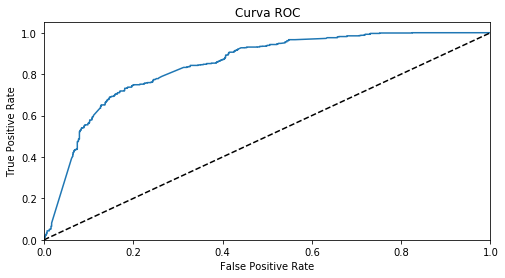

In [224]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 4))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.show()